# Fabric Defects Detection
### Author: Saksham Singh
### Email: screenygeek@gmail.com

In [23]:
# Dataset used: Custom Dataset built upon the benchmark dataset - ZJU Leaper Dataset 
# Link to the original dataset: https://github.com/nico-zck/zju-leaper-dataset

# Import Statements

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
!pip install utils
import utils
from utils.plots import plot_results 

In [15]:
%cd /content/drive/MyDrive/Colab Notebooks/fabric-defects-detection-YOLOv5/

/content/drive/MyDrive/Colab Notebooks/fabric-defects-detection-YOLOv5


# Environment Setup

In [16]:
if not os.path.exists('yolov5'):
  !git clone https://github.com/ultralytics/yolov5.git
  
%cd /content/drive/MyDrive/Colab Notebooks/fabric-defects-detection-YOLOv5/yolov5/
!pip install -r requirements.txt

/content/drive/MyDrive/Colab Notebooks/fabric-defects-detection-YOLOv5/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# EDA (Custom Dataset)

Examples of some samples in the annotated dataset with "defect" as the label

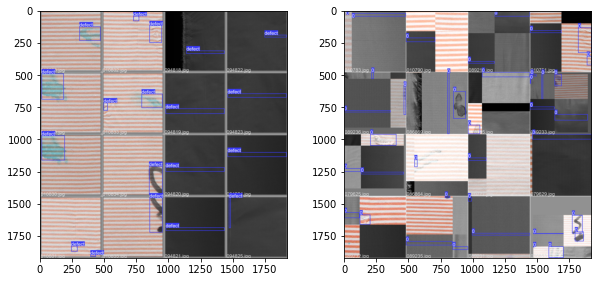

In [54]:
%matplotlib inline
img = cv2.imread("../dataset/example/1.jpg")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img)
img = cv2.imread("../dataset/example/2.jpg")
plt.subplot(2,2,2)
plt.imshow(img)

plt.show()

In [59]:
_, _, files1 = next(os.walk("../dataset/train/images"))
print("Number of Samples in Train Data: ",len(files1))
_, _, files2 = next(os.walk("../dataset/valid/images"))
print("Number of Samples in Validation Data: ",len(files2))

print("Train : Valid ::",len(files1)/(len(files1)+len(files2)),":",len(files2)/(len(files1)+len(files2)))

Number of Samples in Train Data:  116
Number of Samples in Validation Data:  49
Train : Valid :: 0.703030303030303 : 0.296969696969697


# Hyperparameterization

In [17]:
TRAIN = True
EPOCHS = 2500

# Training and Validating YOLOv5 Medium Sized Pretrained Model

In [18]:
!python train.py --img 640 --batch 16 --epochs {EPOCHS} --data ../dataset/data.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=../dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2022-7-1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0

# Testing (Detection)
Testing the trained model on sample images

In [27]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --data ../dataset/data.yaml --source ../dataset/valid/images/010803.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../dataset/valid/images/010803.jpg, data=../dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2022-7-1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/fabric-defects-detection-YOLOv5/dataset/valid/images/010803.jpg: 640x640 1 defect, Done. (0.029s)
Speed: 0.6ms pre-process, 29.4ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/ex

Example of detection made on a sample image

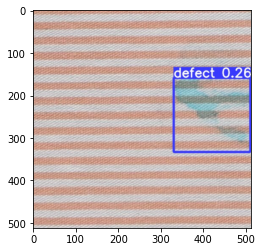

In [35]:
%matplotlib inline
img = cv2.imread("runs/detect/exp/010803.jpg")
plt.imshow(img)
plt.show()

# Results

In [36]:
plot_results('runs/train/exp/results.csv')

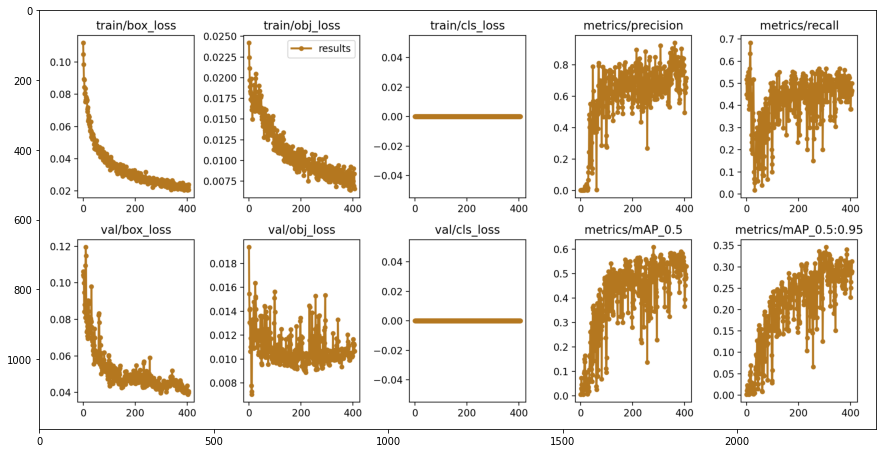

In [42]:
img = cv2.imread("runs/train/exp/results.png")
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

R-Curve

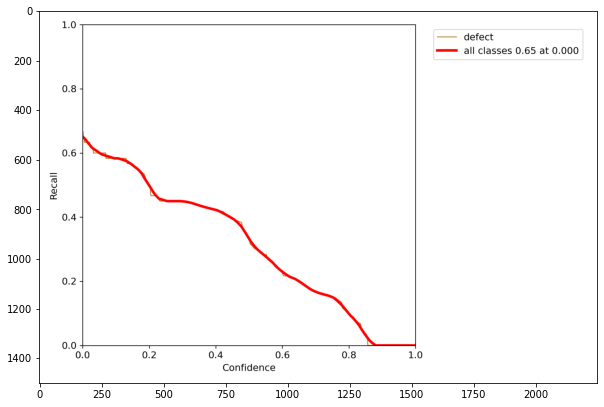

In [44]:
img = cv2.imread("runs/train/exp/R_curve.png")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

F1-Curve

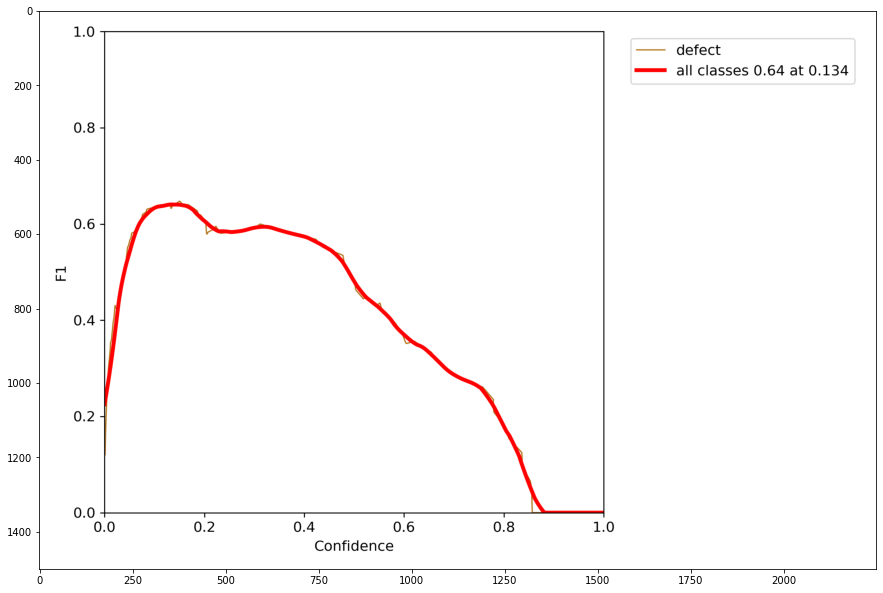

In [46]:
img = cv2.imread("runs/train/exp/F1_curve.png")
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [43]:
# Best Accuracy w/o hyperparameteriztion: 0.718
# Best mAP w/0 hyperparameterization: 0.567